In [51]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import os

In [6]:
CENSUS_DATASET = (
    "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
    "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test",
)

In [8]:
def download_data(path='data', urls=CENSUS_DATASET):
    if not os.path.exists(path):
        os.mkdir(path)

    for url in urls:
        response = requests.get(url)
        name = os.path.basename(url)
        with open(os.path.join(path, name), 'w') as f:
            f.write(response.content)

In [9]:
download_data()

In [3]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 
        'marital-status', 'occupation', 'relationship', 'race', 'gender', 
        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

In [4]:
df_train = pd.read_csv('data/adult.data', sep=",", names = cols)
df_test = pd.read_csv('data/adult.test', sep=",", names = cols)

In [5]:
df_test.loc[df_test.income == ' <=50K.', ['income']] = '<=50K'
df_test.loc[df_test.income == ' >50K.', ['income']] = '>50K'
df_train.loc[df_train.income == ' <=50K', ['income']] = '<=50K'
df_train.loc[df_train.income == ' >50K', ['income']] = '>50K'

In [6]:
data = pd.concat((df_train, df_test), axis=0)

In [39]:
categorical_columns = [x for x in data.columns if data[x].dtype.name == 'object']
numerical_columns = [x for x in data.columns if data[x].dtype.name != 'object']
print categorical_columns
print numerical_columns

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [9]:
data = data[data['workclass'] != ' ?']
data = data[data['occupation'] != ' ?']
data = data[data['native-country'] != ' ?']

In [10]:
for x in categorical_columns:
    print data[x].unique()

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
[' Male' ' Female']
[' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras' ' England' ' Canada' ' Germany' ' Iran' ' Philippines'
 ' Poland' ' Colu

In [40]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


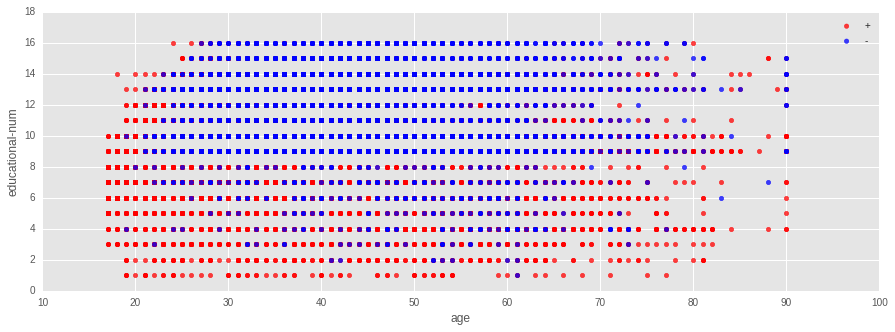

In [45]:
col1 = 'age'
col2 = 'educational-num'
plt.style.use('ggplot')
plt.figure(figsize=(15,5))
plt.scatter(data[col1][data['income'] == '<=50K'],
            data[col2][data['income'] == '<=50K'], 
            color='red',
            alpha=0.75,
            label='+')
plt.scatter(data[col1][data['income'] == '>50K'],
            data[col2][data['income'] == '>50K'], 
            color='blue',
            alpha=0.75,
            label='-')
plt.xlabel(col1)
plt.ylabel(col2)
plt.legend(loc='best')

In [43]:
binary_columns = [c for c in categorical_columns if data[c].unique()]

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
        4064,  4386,  7298,  1409,  3674,  1055,  2050,  2176,   594,
       20051,  6849,  4101,  8614,  3411,  2597, 25236,  4650,  2463,
        3103, 10605,  2964,  3325,  2580,  3471,  4865, 99999,  6514,
        1471,  2329,  2105,  2885, 10520,  2202,  2961, 27828,  6767,
        2228,  1506, 13550,  2635,  5556,  4787,  3781,  3137,  3818,
         914,   401,  2829,  2977,  4934,  2062,  2354,  3464,  5455,
       15020,  1424,  3273, 22040,  4416, 10566,  4931,  7430, 34095,
        6497,  3908,   114,  2346,  2907,  1151,  9386,  2414,  2290,
        3418, 15831, 41310,  4508,  2538,  3456,  1848,  3887,  7896,
        5721,  9562,  6418,  1455,  2036,  3942,  1831, 11678,  2936,
        2993,  7443,  6360,  4687,  1797,  6723,  2009,  3432,  6097,
        1639,  2653, 18481, 25124,  7978,   991,  1173,  2387,  5060,
        1086,  1264,  7262,  1731], dtype=int64)

In [47]:
data_describe = data.describe(include=[object])

In [49]:
binary_columns = [x for x in categorical_columns if data_describe[x]['unique'] == 2]
nonbinary_columns = [x for x in categorical_columns if data_describe[x]['unique'] > 2]
print binary_columns, nonbinary_columns

['gender', 'income'] ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']


In [52]:
for x in binary_columns:
    top = data_describe[x]['top']
    top_items = data[x] == top
    data.loc[top_items, x] = 0
    data.loc[np.logical_not(top_items), x] = 1    

In [56]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
data_nonbinary.columns

Index([u'workclass_ Federal-gov', u'workclass_ Local-gov',
       u'workclass_ Private', u'workclass_ Self-emp-inc',
       u'workclass_ Self-emp-not-inc', u'workclass_ State-gov',
       u'workclass_ Without-pay', u'education_ 10th', u'education_ 11th',
       u'education_ 12th', u'education_ 1st-4th', u'education_ 5th-6th',
       u'education_ 7th-8th', u'education_ 9th', u'education_ Assoc-acdm',
       u'education_ Assoc-voc', u'education_ Bachelors',
       u'education_ Doctorate', u'education_ HS-grad', u'education_ Masters',
       u'education_ Preschool', u'education_ Prof-school',
       u'education_ Some-college', u'marital-status_ Divorced',
       u'marital-status_ Married-AF-spouse',
       u'marital-status_ Married-civ-spouse',
       u'marital-status_ Married-spouse-absent',
       u'marital-status_ Never-married', u'marital-status_ Separated',
       u'marital-status_ Widowed', u'occupation_ Adm-clerical',
       u'occupation_ Armed-Forces', u'occupation_ Craft-repair',

In [57]:
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
data_numerical.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04
mean,-2.500592e-17,5.538571e-17,1.191722e-16,-7.913856e-18,8.273521e-18,2.315116e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.630213e+00,-1.668346e+00,-3.571831e+00,-1.467316e-01,-2.187778e-01,-3.326087e+00
25%,-7.980061e-01,-6.848451e-01,-4.381168e-01,-1.467316e-01,-2.187778e-01,-7.811920e-02
50%,-1.171097e-01,-1.080918e-01,-4.640249e-02,-1.467316e-01,-2.187778e-01,-7.811920e-02
75%,6.394418e-01,4.561874e-01,1.128740e+00,-1.467316e-01,-2.187778e-01,3.382869e-01
max,3.892613e+00,1.231234e+01,2.303883e+00,1.317505e+01,1.053794e+01,4.835473e+00


In [59]:
data = pd.concat((data_numerical, data[binary_columns], data_nonbinary), axis=1)

In [61]:
data = pd.DataFrame(data, dtype=float)
print data.shape
print data.columns

(45222, 104)
Index([u'age', u'fnlwgt', u'educational-num', u'capital-gain', u'capital-loss',
       u'hours-per-week', u'gender', u'income', u'workclass_ Federal-gov',
       u'workclass_ Local-gov',
       ...
       u'native-country_ Portugal', u'native-country_ Puerto-Rico',
       u'native-country_ Scotland', u'native-country_ South',
       u'native-country_ Taiwan', u'native-country_ Thailand',
       u'native-country_ Trinadad&Tobago', u'native-country_ United-States',
       u'native-country_ Vietnam', u'native-country_ Yugoslavia'],
      dtype='object', length=104)


In [62]:
X = data.drop('income', axis=1)
y = data['income']
features_name = X.columns
print features_name

Index([u'age', u'fnlwgt', u'educational-num', u'capital-gain', u'capital-loss',
       u'hours-per-week', u'gender', u'workclass_ Federal-gov',
       u'workclass_ Local-gov', u'workclass_ Private',
       ...
       u'native-country_ Portugal', u'native-country_ Puerto-Rico',
       u'native-country_ Scotland', u'native-country_ South',
       u'native-country_ Taiwan', u'native-country_ Thailand',
       u'native-country_ Trinadad&Tobago', u'native-country_ United-States',
       u'native-country_ Vietnam', u'native-country_ Yugoslavia'],
      dtype='object', length=103)


In [63]:
print X.shape
print y.shape

(45222, 103)
(45222,)


In [64]:
from sklearn.cross_validation import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [66]:
print X_train.shape
print X_test.shape

(31655, 103)
(13567, 103)


In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [69]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

In [71]:
err_train = np.mean(y_train_predict == y_train)
err_test = np.mean(y_test_predict == y_test)
print err_train, err_test

0.878755330911 0.829512788384


In [72]:
from sklearn.grid_search import GridSearchCV
n_neighbors = [1, 3, 5, 7, 10, 15]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors':n_neighbors})
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [74]:
best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print best_cv_err, best_n_neighbors

0.164302637814 15


In [81]:
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)

0.857052598326 0.838800029483


In [82]:
err_train = np.mean(y_train != knn.predict(X_train))
err_test = np.mean(y_test != knn.predict(X_test))
print err_train, err_test

0.142947401674 0.161199970517


In [83]:
knn.metric

'minkowski'